## Capstone Project 1 Code

## Data Cleaning/Wrangling

In [1]:
import pandas as pd
import numpy as np

First, I used Pandas to read in a dataframe from the CSV files (I split the dataset into two files in order to get past GitHub's 100MB file size limit), selecting the columns I am interested in. I used the missing value codes from the Guidebook to convert missing values to 'NaN'.

In [2]:
df = pd.read_csv('global_terrorism1.csv', encoding = 'latin1')
for i in range(len(list(df.columns))):
    print(i, list(df.columns)[i])

C:\Users\joshy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0 eventid
1 iyear
2 imonth
3 iday
4 approxdate
5 extended
6 resolution
7 country
8 country_txt
9 region
10 region_txt
11 provstate
12 city
13 latitude
14 longitude
15 specificity
16 vicinity
17 location
18 summary
19 crit1
20 crit2
21 crit3
22 doubtterr
23 alternative
24 alternative_txt
25 multiple
26 success
27 suicide
28 attacktype1
29 attacktype1_txt
30 attacktype2
31 attacktype2_txt
32 attacktype3
33 attacktype3_txt
34 targtype1
35 targtype1_txt
36 targsubtype1
37 targsubtype1_txt
38 corp1
39 target1
40 natlty1
41 natlty1_txt
42 targtype2
43 targtype2_txt
44 targsubtype2
45 targsubtype2_txt
46 corp2
47 target2
48 natlty2
49 natlty2_txt
50 targtype3
51 targtype3_txt
52 targsubtype3
53 targsubtype3_txt
54 corp3
55 target3
56 natlty3
57 natlty3_txt
58 gname
59 gsubname
60 gname2
61 gsubname2
62 gname3
63 gsubname3
64 motive
65 guncertain1
66 guncertain2
67 guncertain3
68 individual
69 nperps
70 nperpcap
71 claimed
72 claimmode
73 claimmode_txt
74 claim2
75 claimmode2
76 claimmode2_txt

In [3]:
col_indexes =  [1,2,9,13,14,19,20,21,26,27,28,30,32,34,42,50,68,81,85,89,93,98,101,104,105]

terrorism_df1 = pd.read_csv('global_terrorism1.csv', encoding = 'latin1', usecols = col_indexes, 
                           na_values = {'attacktype1': 9, 'weaptype1': 13, 'targtype1': 20, 'property': -9, 'propextent':4})

terrorism_df2 = pd.read_csv('global_terrorism2.csv', encoding = 'latin1', usecols = col_indexes, 
                           na_values = {'attacktype1': 9, 'weaptype1': 13, 'targtype1': 20, 'property': -9, 'propextent':4})

terrorism_df = terrorism_df1.append(terrorism_df2)

In [4]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170350 entries, 0 to 59601
Data columns (total 25 columns):
iyear          170350 non-null int64
imonth         170350 non-null int64
region         170350 non-null int64
latitude       165744 non-null float64
longitude      165744 non-null float64
crit1          170350 non-null int64
crit2          170350 non-null int64
crit3          170350 non-null int64
success        170350 non-null int64
suicide        170350 non-null int64
attacktype1    163925 non-null float64
attacktype2    5630 non-null float64
attacktype3    374 non-null float64
targtype1      165477 non-null float64
targtype2      10018 non-null float64
targtype3      1034 non-null float64
individual     170350 non-null int64
weaptype1      156498 non-null float64
weaptype2      11843 non-null float64
weaptype3      1660 non-null float64
weaptype4      74 non-null float64
nkill          160668 non-null float64
nwound         155025 non-null float64
property       150771 non-

The dataframe has missing values for many columns. I exclude rows with missing values for some columns. Note that a few features, such as attack type, are represented by multiple columns (since an attack can be classified as multiple types, use multiple weapons, etc.). Because I'll convert all of these columns to dummy variables, I only need to filter by the first column - if 'attacktype1' is missing for a row, then 'attacktype2' and 'attacktype 3' will also be missing, and so on for the other columns. I also only filter for missing values in columns that I ended up using in my analysis.

In [5]:
#Remove rows with missing values
filter_cols = ['attacktype1', 'targtype1', 'weaptype1', 'nkill', 'latitude', 'longitude']

cleaned_df = terrorism_df.dropna(axis = 0, how = 'any', subset = filter_cols)
cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140928 entries, 0 to 140927
Data columns (total 25 columns):
iyear          140928 non-null int64
imonth         140928 non-null int64
region         140928 non-null int64
latitude       140928 non-null float64
longitude      140928 non-null float64
crit1          140928 non-null int64
crit2          140928 non-null int64
crit3          140928 non-null int64
success        140928 non-null int64
suicide        140928 non-null int64
attacktype1    140928 non-null float64
attacktype2    4907 non-null float64
attacktype3    337 non-null float64
targtype1      140928 non-null float64
targtype2      8843 non-null float64
targtype3      890 non-null float64
individual     140928 non-null int64
weaptype1      140928 non-null float64
weaptype2      10587 non-null float64
weaptype3      1515 non-null float64
weaptype4      63 non-null float64
nkill          140928 non-null float64
nwound         135589 non-null float64
property       123859 non-n

Next, I convert the categorical, non-binary columns - region, attack type, weapon type, and target type - into dummy variables. For the features with multiple columns, such as attack type, a column representing one attack type has a value of 1 if 'attacktype1', 'attacktype2', or 'attacktype3' have a value corresponding to that type. For each feature, I leave out one value that I do not convert to a dummy column, as the last column for a set of dummy variables is redundant. In the case of weapon type and target type, there are codes corresponding to "other", so I leave out that value.

In [6]:
region_dict = {1: 'North America', 2: 'Central America', 3: 'South America', 4: 'East Asia', 5: 'SE Asia', 6: 'South Asia', 
7: 'Central Asia', 8: 'West Europe',9: 'East Europe',10: 'ME and North Africa', 
11: 'Sub-Saharan Africa', 12: 'Oceania'}

#leave one out
for i in range(1,12):
    cleaned_df[region_dict[i]] = (cleaned_df['region'] == i).astype(int)
    
type_dict = {1:'Assassination', 2:'Armed Assault',
            3:'Bombing', 4:'Hijacking', 5:'Hostage (Barricade)',
             6:'Kidnapping', 7:'Infrastructure', 8:'Unarmed Assault'}

for i in range(1,8):
    cleaned_df[type_dict[i]] = ((cleaned_df['attacktype1'] == i) | (cleaned_df['attacktype2'] == i)
                                | (cleaned_df['attacktype3'] == i)).astype(int)
    
weapon_dict = {1:'Biological',2:'Chemical',3:'Radiological',
            4:'Nuclear',5:'Firearms',6:'Explosives',
            7:'Fake Weapon', 8:'Incendiary', 9:'Melee',
            10:'Vehicle',11:'Sabotage Equipment', 12:'Other'}

for i in range(1,12):
    cleaned_df[weapon_dict[i]] = ((cleaned_df['weaptype1'] == i) | (cleaned_df['weaptype2'] == i) 
                                   | (cleaned_df['weaptype3'] == i) | (cleaned_df['weaptype4'] == i)).astype(int)
    
target_dict = {1:'Business', 2:'Government', 3:'Police',4:'Military',5:'Abortion',6:'Aviation',7:'Diplomatic',8:'Education',9:'FoodWater',10:'Media',
              11:'Maritime', 12:'NGO',13:'Other',14:'Private',15:'Religious',16:'Telecommunication',
              17:'Terrorists', 18:'Tourists', 19:'Transportation',21:'Utilities',22:'Violent Parties'}

target_codes = [i for i in range(1,23) if i != 13 and i != 20]

for i in target_codes:
    cleaned_df[target_dict[i]] = ((cleaned_df['targtype1'] == i) | (cleaned_df['targtype2'] == i)
                                | (cleaned_df['targtype3'] == i)).astype(int)

Finally, I export the cleaned dataframe to a new CSV file.

In [7]:
cleaned_df.to_csv('cleaned.csv')

## Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned.csv')

My capstone project will investigate the factors that affect the likelihoood that an attempted terrorist attack will succeed. I will start by showing some general trends in terrorist attacks. 

First, here is the number of attacks by year:

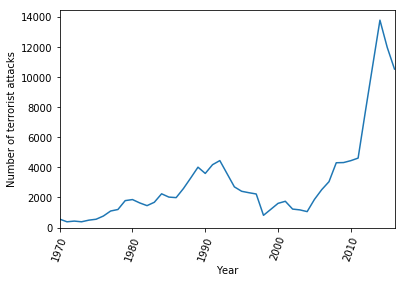

In [9]:
year_counts = df.groupby(['iyear'])['iyear'].count()

_ = year_counts.plot(kind='line', rot = 70)
_ = plt.ylim(ymin = 0)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of terrorist attacks')
plt.show()

As this plot shows, there is a spike in terrorist attacks in the late 1980s and early 1990s in this dataset, and a larger spike occurring after 2010. This now raises the question of what caused the spike in attacks. It could be caused by better reporting leading to a higher proportion of terrorist attacks being listed in the dataset, or geopolitical trends such as instability in the Middle East leading to an actual spike in attacks. Thus, I will now analyze the breakdown in attacks by year and region:

In [10]:
region_dict = {1: 'North America', 2: 'Central America', 3: 'South America', 4: 'East Asia', 5: 'SE Asia', 6: 'South Asia', 
7: 'Central Asia', 8: 'West Europe',9: 'East Europe',10: 'ME and North Africa', 
11: 'Sub-Saharan Africa', 12: 'Oceania'}

df['region_name'] = df['region'].replace(region_dict)

region_counts = df.groupby(['region_name'])['success'].count()
print(region_counts.sort_values())

highcount_regions = [2, 5, 11, 8, 3, 6, 10]
regionyear_df = df.loc[df['region'].isin(highcount_regions)]

region_name
Oceania                  224
Central Asia             486
East Asia                701
North America           3111
East Europe             4463
Central America         6481
SE Asia                 9879
Sub-Saharan Africa     11905
West Europe            14230
South America          14598
South Asia             35206
ME and North Africa    39644
Name: success, dtype: int64


The Middle East and North Africa, South Asia, and South America are the regions with the largest number of attacks in the dataset. Now I will use a stacked area chart to show the trends over time for the seven regions with the most attacks.

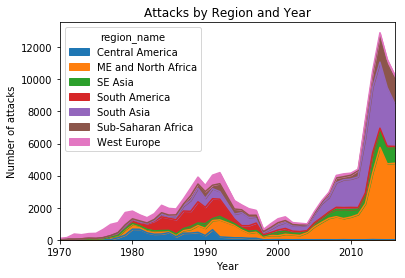

In [11]:
regionyear_df = regionyear_df.groupby(['iyear', 'region_name'])['region'].count().reset_index()
regionyear_df = regionyear_df.pivot(index = 'iyear', columns = 'region_name', values = 'region')
#print(regionyear_df)

_ = regionyear_df.plot.area()
_ = plt.title('Attacks by Region and Year')
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of attacks')
plt.show()

As this plot shows, there are clear differences in the distribution of attacks by region over time. South Asia and the Middle East and North Africa appear to be the main contributors to the recent spike in attacks. South America and Western Europe have seen large declines in both the absolute number of attacks, and their share in the world total, over time. Because the spike in attacks is not uniform by region, this suggests that the 2010s spike was likely caused, at least in part, by changes in political situation in addition to differences in reporting or measurement.

Next, I will use exploratory data analysis to investigate how success rate varies based on several variables. In this dataset, whether an attack succeeds is based on whether the attack occurs and leads to tangible effects, but does not depend on whether it achieves the long-term goals of the attack. For example, a bombing succeeds if the bomb detonates, though the broader societal affect of the detonation may vary from attack to attck. 

First, I show the success rate grouped by region:

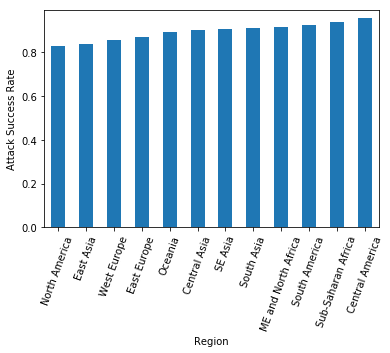

In [12]:
region_success_counts = df.groupby(['region_name'])['success'].sum()
region_counts = df.groupby(['region_name'])['success'].count()
region_success_ratio = region_success_counts.divide(region_counts)
region_success_ratio = region_success_ratio.sort_values()

_ = region_success_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Success Rate')
plt.margins(0.04)
plt.show()

As the graph shows, there is some difference in success rate by region, but the success rate does not vary too much. Next, I break down success rate by whether the terrorist attack was carried out by an individual (as opposed to a group or organization):

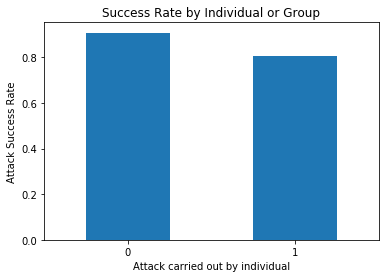

In [13]:
individual_counts = df.groupby(['individual'])['success'].count()
individual_success_counts = df.groupby(['individual'])['success'].sum()
individual_success_ratio = individual_success_counts.divide(individual_counts)

_ = individual_success_ratio.plot(kind='bar', rot = 0)
_ = plt.title('Success Rate by Individual or Group')
_ = plt.xlabel('Attack carried out by individual')
_ = plt.ylabel('Attack Success Rate')
plt.show()

The plot shows that individual attacks have a lower success rate. Here is attack success rate grouped by weapon type:

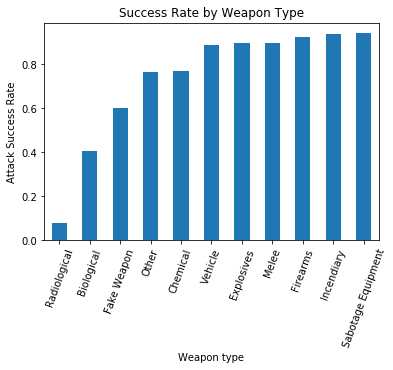

In [14]:
weapon_dict = {1:'Biological',2:'Chemical',3:'Radiological',
            4:'Nuclear',5:'Firearms',6:'Explosives',
            7:'Fake Weapon', 8:'Incendiary', 9:'Melee',
            10:'Vehicle',11:'Sabotage Equipment', 12:'Other'}

df['weapname1'] = df['weaptype1'].replace(weapon_dict)

weap_counts = df.groupby(['weapname1'])['success'].count()
weap_success_counts = df.groupby(['weapname1'])['success'].sum()
weap_success_ratio = weap_success_counts.divide(weap_counts)
weap_success_ratio = weap_success_ratio.sort_values()

_ = weap_success_ratio.plot(kind='bar', rot = 70)
_ = plt.title('Success Rate by Weapon Type')
_ = plt.xlabel('Weapon type')
_ = plt.ylabel('Attack Success Rate')
plt.show()

Some weapon types feature much lower success rates than the others. Radiological attacks rarely succeed, while attacks with sabotage equipment, incendiary weapons, and firearms usually succeed. Next, I show attack success rate grouped by attack type:

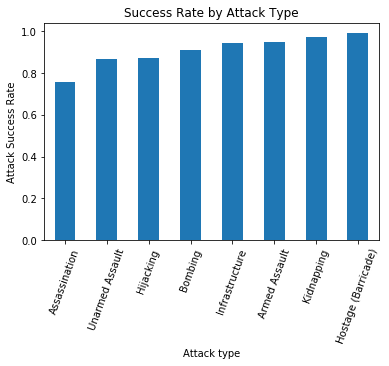

In [15]:
type_dict = {1:'Assassination', 2:'Armed Assault',
            3:'Bombing', 4:'Hijacking', 5:'Hostage (Barricade)',
             6:'Kidnapping', 7:'Infrastructure', 8:'Unarmed Assault'}

df['typename1'] = df['attacktype1'].replace(type_dict)

type_counts = df.groupby(['typename1'])['success'].count()
type_success_counts = df.groupby(['typename1'])['success'].sum()
type_success_ratio = type_success_counts.divide(type_counts)

type_success_ratio = type_success_ratio.sort_values()

_ = type_success_ratio.plot(kind='bar', rot = 70)
_ = plt.title('Success Rate by Attack Type')
_ = plt.xlabel('Attack type')
_ = plt.ylabel('Attack Success Rate')
plt.show()

Assassinations are less successful than other types of attacks, while kidnappings and hostage attacks are usually successful. This may result in assassination being more difficult- an assassination must lead to the death of the intended target to be marked as a success in the dataset.

Now that I have explored success rates, I will investigate the effects of these attacks. First, I will look at the distribution of casualties from terrorist attacks:

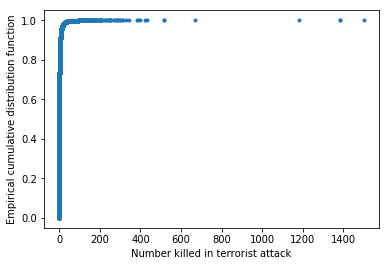

In [16]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x, y = ecdf(df['nkill'])

_ = plt.plot(x,y, linestyle = 'none', marker = '.')
_ = plt.xlabel('Number killed in terrorist attack')
_ = plt.ylabel('Empirical cumulative distribution function')
plt.show()

The data is right-skewed and a few outliers make this graph hard to read. We can focus on attacks with a lower casualty count (< 100) to get a better idea of the distribution:

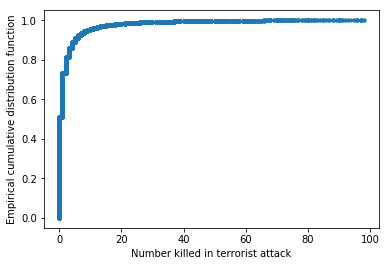

In [17]:
df2 = df[df['nkill'] < 100]

x, y = ecdf(df2['nkill'])

_ = plt.plot(x,y, linestyle = 'none', marker = '.')
_ = plt.xlabel('Number killed in terrorist attack')
_ = plt.ylabel('Empirical cumulative distribution function')
plt.show()

The plot shows that a large proportion (perhaps half) of attacks lead to 0 fatalities, and a large majority lead to fewer than 10 fatalities. Since the overall success rate is over 80%, this shows that a good number of successful terrorist attacks lead to no fatalities, or at least few fatalities. The terrorist attacks with high death counts that are covered in the media are not representative of terrorist attacks overall.

Next, I will explore which factors determine whether an attack will lead to a fatality. Here are attacks grouped by region:

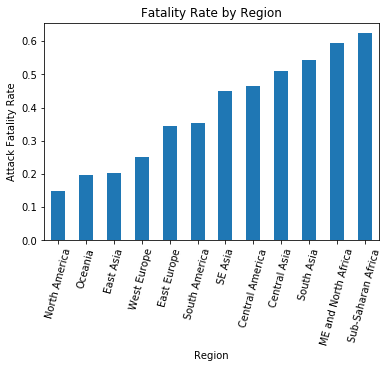

In [18]:
df['fatal'] = df['nkill'] > 0
region_fatal_counts = df.groupby(['region_name'])['fatal'].sum()
region_fatal_ratio = region_fatal_counts.divide(region_counts)
region_fatal_ratio = region_fatal_ratio.sort_values()

_ = region_fatal_ratio.plot(kind='bar', rot = 75)
_ = plt.title('Fatality Rate by Region')
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

The ranking of the regions is similar to the plot for success rate. However, the fatality rates differ largely by region. Most attacks lead to fatalities in Africa and the Middle East, while most attacks do not lead to fatalities in North America, Western Europe, and East Asia. There appears to be a relationship between the economic success and political stability of a region and a low fatality rate of attacks.

Next, I show the fatality rate of attacks grouped by whether the perpetrator was an individual.

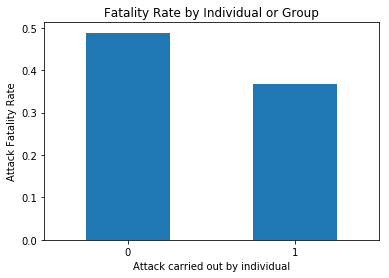

In [19]:
individual_counts = df.groupby(['individual'])['fatal'].count()
individual_fatal_counts = df.groupby(['individual'])['fatal'].sum()
individual_fatal_ratio = individual_fatal_counts.divide(individual_counts)

_ = individual_fatal_ratio.plot(kind='bar', rot = 0)
_ = plt.title('Fatality Rate by Individual or Group')
_ = plt.xlabel('Attack carried out by individual')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

Attacks carried out by individuals have a lower fatality rate. Next, I show the fatality rate of attacks grouped by weapon type:

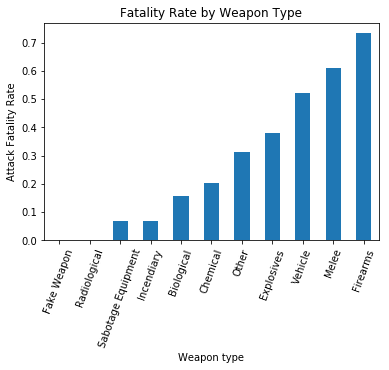

In [20]:
weap_counts = df.groupby(['weapname1'])['fatal'].count()
weap_fatal_counts = df.groupby(['weapname1'])['fatal'].sum()
weap_fatal_ratio = weap_fatal_counts.divide(weap_counts)
weap_fatal_ratio = weap_fatal_ratio.sort_values()

_ = weap_fatal_ratio.plot(kind='bar', rot = 70)
_ = plt.title('Fatality Rate by Weapon Type')
_ = plt.xlabel('Weapon type')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

This plot shows large differences in fatality rates between weapon types. Perhaps unsurprisingly, firearms have a relatively high fatality rate. Attacks using fake weapons and radiological weapons do not lead to any fatalities in this data set.

Next, I show fatality rate based on attack type:

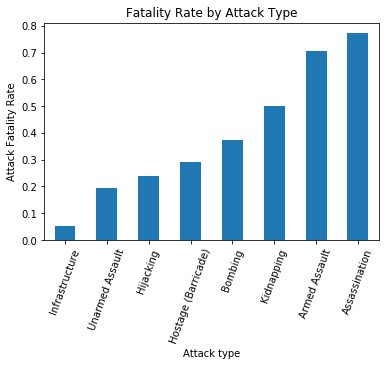

In [21]:
type_counts = df.groupby(['typename1'])['fatal'].count()
type_fatal_counts = df.groupby(['typename1'])['fatal'].sum()
type_fatal_ratio = type_fatal_counts.divide(type_counts)

type_fatal_ratio = type_fatal_ratio.sort_values()

_ = type_fatal_ratio.plot(kind='bar', rot = 70)
_ = plt.title('Fatality Rate by Attack Type')
_ = plt.xlabel('Attack type')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

There are large differences in fatality rate based on attack type, in fairly predictable ways. Most assassinations and armed assaults lead to fatalities. Most infrastructure attacks and unarmed assaults do not lead to any deaths.

Next, I will look at whether there is a relationship between number of deaths and the number wounded in attacks. To make the scatter plot readable, I removed a few outliers.

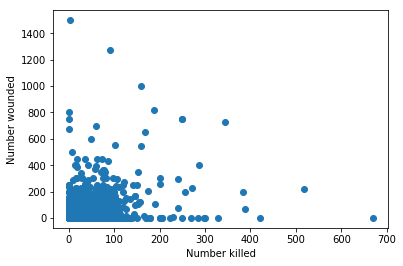

In [22]:
df3 = df[df['nkill'] < 1000]# & df['nwound'] < 3000]
df3 = df3[df3['nwound'] < 3000]

_ = plt.scatter(df3['nkill'],  df3['nwound'])
_ = plt.xlabel('Number killed')
_ = plt.ylabel('Number wounded')
plt.show()

## Inferential Statistics

I have found some interesting patterns in how the success rate of attacks varied by region, attack type, and whether the attack was carried out by an individual or group. In preparation for attempting to build a model to predict success rate, I will now look into whether some of these patterns are statistically significant. 

First, I will look at whether there is a difference in the success rate of attacks carried out by individuals compared to attacks carried out by groups. From the codebook, the individual variable "indicates whether or not the attack was carried out by an individual or several individuals not known to be affiliated with a group or organization." The null hypothesis is that the proportion of attacks attempted by unaffiliated individuals that succeed is the same as the proportion of attacks attemped by groups that are successful. The alternative hypothesis is that the success rate for attacks attempt by unaffiliated individuals is smaller than the success rate for group attacks.

In [23]:
from scipy import stats
ind_n = df[df['individual'] == 1]['individual'].count()

group_n = df[df['individual'] == 0]['individual'].count()

ind_prop = sum(df[df['individual'] == 1].success)/ind_n

group_prop = sum(df[df['individual'] == 0].success)/group_n

print("Success rate for individuals: " + str(ind_prop))
print("Success rate for groups: " + str(group_prop))
print("Number of individual attacks:", ind_n)
print("Number of group attacks:", group_n)

from statsmodels.stats.proportion import proportions_ztest

successes = np.array([sum(df[df['individual'] == 1].success), sum(df[df['individual'] == 0].success)])
n_obs = (ind_n, group_n)

z, p = proportions_ztest(successes, n_obs, alternative = 'smaller')
print("z:", z,"\np-value:", p)

Success rate for individuals: 0.804400977995
Success rate for groups: 0.908204584433
Number of individual attacks: 409
Number of group attacks: 140519
z: -7.24938561643 
p-value: 2.09333176584e-13


With a small p-value, we conclude that there is a statistically significant difference between the proportion of individual terrorist attacks that are successful and the proportion of terrorist attacks conducted by organizations that are successful. This suggests that whether an attack is carried out by an individual or group may be a useful feature for predicting the success rate of an attack. 

Now I compute the standard error for the difference in proportions, using the formula SE = $\sqrt{p_{1}(1-p_{1})/n_{1} + p_{2}(1-p_{2})/n_{2}}$. In addition, I compute the 95% confidence interval, using 1.96 as the z-value corresponding to 95% confidence.

In [24]:
SE_diff = ((ind_prop * (1 - ind_prop) / ind_n) + (group_prop * (1 - group_prop) / group_n))**0.5

print("Standard error:", SE_diff)

CI_diff = [group_prop - ind_prop - 1.96 * SE_diff, group_prop - ind_prop + 1.96 * SE_diff]
print("95% CI for difference in proportions:", CI_diff)

Standard error: 0.0196287487915
95% CI for difference in proportions: [0.065331258806950732, 0.14227595406967281]


I will now test whether there is a relationship between an attack's region and its success rate. Because I am testing the relationship between an observed proportion with the dependent variable being multiple categories, a chi-square test for independence is appropriate. I will test the null hypothesis that the success rate does not differ by region, with the alternative hypothesis that success rates are not the same for every region.

In [25]:
#collect observed success and failures for each region
observations = []

for i in range(1,13):
    success_count = df[df['region'] == i]['success'].sum()
    failure_count = df[df['region'] == i]['success'].count() - success_count
    counts = [success_count, failure_count]
    observations.append(counts)
    
from scipy.stats import chi2_contingency

chi2, p, dof, expected = stats.chi2_contingency(observations)
print("Chi-squared:", chi2, "\np:", p)

Chi-squared: 1193.05506979 
p: 5.08331220608e-249


Because the p-value is very small, we can reject the null hypothesis and conclude the region does affect the success rate. This makes it a feature of interest in our analysis. However, this test does not necessarily tell us anything about the success rate of specific regions, just that some regions have different success rates than others. 

Central America has the highest attack success rate of any region. I will compare the null hypothesis that attacks in Central America have the same success rate as attacks elsewhere with the alternative hypothesis that the success rate in Central America is greater than the success rate elsewhere.

In [26]:
df['Central_America'] = df['region'] == 2
central_n = df[df['Central_America'] == True]['success'].count()
non_central_n = df[df['Central_America'] == False]['success'].count()

central_prop = df[df['Central_America'] == True]['success'].sum()/central_n
non_central_prop = df[df['Central_America'] == False]['success'].sum()/non_central_n

print("Success rate in Central America:",central_prop)
print("Success rate outside Central America:", non_central_prop)

successes = np.array([sum(df[df['Central_America'] == True].success), sum(df[df['Central_America'] == False].success)])
n_obs = (central_n, non_central_n)
z, p = proportions_ztest(successes, n_obs, alternative = 'larger')
print("z:", z,"\np-value:", p)

Success rate in Central America: 0.955716710384
Success rate outside Central America: 0.905598488624
z: 13.6286174827 
p-value: 1.35329591881e-42


95.8% of attacks in Central America are successful, compared to 89.55% of attacks in the rest of the world. The p-value is extremely small, so we can safely reject the null hypothesis. 

South Asia has a success rate that is closer to the average. This region (which includes Afghanistan, Pakistan, and India) is populous and sees a high number of terrorist attacks. Since the rate is closer to average, I will use a two-sided test, and test the null hypothesis that attacks in South Asia have the same success rate as attacks elsewhere against the alternative hypothesis that the success rate in South Asia is different than the success rate elsewhere. 

In [27]:
df['S_Asia'] = df['region'] == 6
sa_n = df[df['S_Asia'] == True]['success'].count()
non_sa_n = df[df['S_Asia'] == False]['success'].count()

sa_prop = df[df['S_Asia'] == True]['success'].sum()/sa_n
non_sa_prop = df[df['S_Asia'] == False]['success'].sum()/non_sa_n

print("Success rate in South Asia:",sa_prop)
print("Success rate outside South Asia:", non_sa_prop)

successes = np.array([sum(df[df['S_Asia'] == True].success), sum(df[df['S_Asia'] == False].success)])
n_obs = (sa_n, non_sa_n)
z, p = proportions_ztest(successes, n_obs)
print("z:", z,"\np-value:", p)

Success rate in South Asia: 0.909759700051
Success rate outside South Asia: 0.907285144057
z: 1.39074623543 
p-value: 0.164302391814


This p-value is fairly small, but since I have tested multiple hypotheses with the same data set, it may be advisable to use a Bonferroni correction. If we use a 5% significance level, then across the 7 hypotheses in this analysis, the p-value threshold for each test would be 0.0071. This would mean that I fail the reject the null hypothesis that attacks in South Asia have the same success rate as other attacks.  

I will now turn to the relationship between attack type and success rate. As before, a chi-square test for independence is appropriate for testing the null hypothesis that success rate is independent of attack type against the alternative hypothesis that attack type affects the success rate.

In [28]:
#collect observed success and failures for each attack type
type_obs = []

for i in range(1,9):
    success_count = df[df['attacktype1'] == i]['success'].sum()
    failure_count = df[df['attacktype1'] == i]['success'].count() - success_count
    counts = [success_count, failure_count]
    type_obs.append(counts)
    
chi2, p, dof, expected = stats.chi2_contingency(type_obs)
print("Chi-squared:", chi2, "\np:", p)

Chi-squared: 5672.2686479 
p: 0.0


This p-value is very small, so we can reject the null hypothesis that success rate is independent of attack type, making this another feature of interest in our analysis.

Because assassinations have the lowest success rate, and because they are one of the most salient and consequential types of attacks, I will now test the null hypothesis that assassination has the same success rate as other types of attacks, compared with the alternative hypothesis that assassinations have a lower success rate than other types of attacks:

In [29]:
df['Assassination'] = df['attacktype1'] == 1
assassin_n = df[df['Assassination'] == True]['success'].count()
non_assassin_n = df[df['Assassination'] == False]['success'].count()

assassin_prop = df[df['Assassination'] == True]['success'].sum()/assassin_n
non_assassin_prop = df[df['Assassination'] == False]['success'].sum()/non_assassin_n

print("Success rate for assassinations:",assassin_prop)
print("Success rate for non-assassinations:", non_assassin_prop)

successes = np.array([sum(df[df['Assassination'] == True].success), sum(df[df['Assassination'] == False].success)])
n_obs = (assassin_n, non_assassin_n)
z, p = proportions_ztest(successes, n_obs, alternative = 'smaller')
print("z:", z,"\np-value:", p)

Success rate for assassinations: 0.756698755288
Success rate for non-assassinations: 0.927691604009
z: -71.0138936023 
p-value: 0.0


This p-value is extremely small, so we can reject the null hypothesis. Hijackings appear to have a success rate that is lower than average, but that is closer to the average than assassinations. Hijackings are also a type of attack that are of high interest to the public and to safety officials. I will next evaluate the null hypothesis that hijackings have the same success rate as other attacks, compared with the alternative hypothesis that hijackings have a different success rate from non-hijacking attacks. 

In [30]:
df['Hijack'] = df['attacktype1'] == 4
hijack_n =  df[df['Hijack'] == True]['success'].count()
non_hijack_n = df[df['Hijack'] == False]['success'].count()

hijack_prop = df[df['Hijack'] == True]['success'].sum()/hijack_n
non_hijack_prop = df[df['Hijack'] == False]['success'].sum()/non_hijack_n

print("Success rate for hijackings :", hijack_prop)
print("Success rate for non-hijackings:", non_hijack_prop)

successes = np.array([sum(df[df['Hijack'] == True].success), sum(df[df['Hijack'] == False].success)])
n_obs = (hijack_n, non_hijack_n)
z, p = proportions_ztest(successes, n_obs)
print("z:", z,"\np-value:", p)

Success rate for hijackings : 0.870229007634
Success rate for non-hijackings: 0.908008681111
z: -2.58646320421 
p-value: 0.00969665229582


Again, this p-value is fairly small, but after applying the Bonferroni correction, I fail the reject the null hypothesis that hijackings have the same success rate as other attacks.  

## Classification

First, I import some the necessary packages and define a function that computes the average score of a model after cross-validation.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

#does cross-validation and computes average score for the 5 folds
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold, random_state = 42).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y.iloc[train]) # fit
        result += score_func(clf.predict(x[test]), y.iloc[test]) # evaluate score function on held-out data
    return result / nfold # average

Next, I select the explanatory variables that I will use to build the models.

In [32]:
cols = list(df.columns.values)
for i in range(len(cols)):
    print(i, cols[i])

0 Unnamed: 0
1 iyear
2 imonth
3 region
4 latitude
5 longitude
6 crit1
7 crit2
8 crit3
9 success
10 suicide
11 attacktype1
12 attacktype2
13 attacktype3
14 targtype1
15 targtype2
16 targtype3
17 individual
18 weaptype1
19 weaptype2
20 weaptype3
21 weaptype4
22 nkill
23 nwound
24 property
25 propextent
26 North America
27 Central America
28 South America
29 East Asia
30 SE Asia
31 South Asia
32 Central Asia
33 West Europe
34 East Europe
35 ME and North Africa
36 Sub-Saharan Africa
37 Assassination
38 Armed Assault
39 Bombing
40 Hijacking
41 Hostage (Barricade)
42 Kidnapping
43 Infrastructure
44 Biological
45 Chemical
46 Radiological
47 Nuclear
48 Firearms
49 Explosives
50 Fake Weapon
51 Incendiary
52 Melee
53 Vehicle
54 Sabotage Equipment
55 Business
56 Government
57 Police
58 Military
59 Abortion
60 Aviation
61 Diplomatic
62 Education
63 FoodWater
64 Media
65 Maritime
66 NGO
67 Private
68 Religious
69 Telecommunication
70 Terrorists
71 Tourists
72 Transportation
73 Utilities
74 Violent 

In [33]:
explanatory_vars = cols[4:9] + [cols[10]] + [cols[17]] + cols[26:75]

print(explanatory_vars)

['latitude', 'longitude', 'crit1', 'crit2', 'crit3', 'suicide', 'individual', 'North America', 'Central America', 'South America', 'East Asia', 'SE Asia', 'South Asia', 'Central Asia', 'West Europe', 'East Europe', 'ME and North Africa', 'Sub-Saharan Africa', 'Assassination', 'Armed Assault', 'Bombing', 'Hijacking', 'Hostage (Barricade)', 'Kidnapping', 'Infrastructure', 'Biological', 'Chemical', 'Radiological', 'Nuclear', 'Firearms', 'Explosives', 'Fake Weapon', 'Incendiary', 'Melee', 'Vehicle', 'Sabotage Equipment', 'Business', 'Government', 'Police', 'Military', 'Abortion', 'Aviation', 'Diplomatic', 'Education', 'FoodWater', 'Media', 'Maritime', 'NGO', 'Private', 'Religious', 'Telecommunication', 'Terrorists', 'Tourists', 'Transportation', 'Utilities', 'Violent Parties']


I also define the 'fatal' column, and print the proportion of attacks that are successful, and that lead to fatalities, to help benchmark the performance of my models.

In [34]:
df['fatal'] = df['nkill'] > 0

print(df['success'].sum()/df['success'].count())

print(df['fatal'].sum()/df['fatal'].count())

0.907903326521
0.488235127157


90.7% of attacks in this dataset are successful, and 48.8% lead to fatalities.

Now I split the data into training and test data. I will also split the training data further into "holdout" data and non-holdout training. Training the model on the non-holdout training data, and evaluating the data on the holdout data serves a similar function to cross-validation, but allows me to print a single confusion matrix per model.

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df[explanatory_vars].values, df['success'], random_state = 42, test_size = 0.2)

Xtraining, Xholdout, ytraining, yholdout = train_test_split(Xtrain, ytrain, random_state = 42, test_size = 0.2)

Now I will instantiate a logistic regression model and evaluate it using the cv_score function (cv_score fits the model inside the function).

In [36]:
Log_clf = LogisticRegression()

print(cv_score(Log_clf, Xtrain, ytrain))

0.91186957223


The logistic regression classifier shows high accuracy, but because around 90% of attacks were successful to begin with, this does not necessarily mean the classifier is useful. Let's see the classification report for this classifier on the training data:

In [37]:
Log_clf = LogisticRegression()
Log_clf.fit(Xtrain, ytrain)
print(classification_report(yholdout, Log_clf.predict(Xholdout)))

             precision    recall  f1-score   support

          0       0.64      0.12      0.20      2121
          1       0.92      0.99      0.95     20428

avg / total       0.89      0.91      0.88     22549



This shows that the classifier has very low recall (0.12) for attacks that are not successful. This means that, out of the attacks that were not successful, the model correctly classifies only 12% of those attacks. I will now see if tuning the regularization parameter will help alleviate this problem.

In [38]:
Cs = [0.001, 0.1, 1, 10, 100]

for c in Cs:
    reg_clf = LogisticRegression(C = c)
    reg_clf.fit(Xtraining, ytraining)
    print("c:", c)
    print(classification_report(yholdout, reg_clf.predict(Xholdout)))

c: 0.001


C:\Users\joshy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2121
          1       0.91      1.00      0.95     20428

avg / total       0.82      0.91      0.86     22549

c: 0.1
             precision    recall  f1-score   support

          0       0.64      0.12      0.20      2121
          1       0.92      0.99      0.95     20428

avg / total       0.89      0.91      0.88     22549

c: 1
             precision    recall  f1-score   support

          0       0.64      0.12      0.20      2121
          1       0.92      0.99      0.95     20428

avg / total       0.89      0.91      0.88     22549

c: 10
             precision    recall  f1-score   support

          0       0.64      0.12      0.20      2121
          1       0.92      0.99      0.95     20428

avg / total       0.89      0.91      0.88     22549

c: 100
             precision    recall  f1-score   support

          0       0.64      0.12      0.20      2121
        

Regularization does not improve matters here. Next, I will try random forests:

In [39]:
#print cross-validated score for training and holdout data combined
Rf_clf = RandomForestClassifier(random_state = 42)
print(cv_score(Rf_clf, Xtrain, ytrain))

#print classification report for just the holdout data
Rf_clf = RandomForestClassifier(random_state = 42)
Rf_clf.fit(Xtraining, ytraining)

print(classification_report(yholdout, Rf_clf.predict(Xholdout)))

0.897562567564
             precision    recall  f1-score   support

          0       0.45      0.29      0.35      2121
          1       0.93      0.96      0.95     20428

avg / total       0.88      0.90      0.89     22549



Random forests performs somewhat better, with 29% recall for unsuccessful attacks, while maintaining high precision and recall for successful attacks.

Next, I will move on to predicting whether an attack will lead to fatalities. First, I create new training and test sets:

In [40]:
Xtrain_f, Xtest_f, ytrain_f, ytest_f = train_test_split(df[explanatory_vars].values, df['fatal'], random_state = 42, test_size = 0.2)

In [41]:
Log_clf_f = LogisticRegression()

print(cv_score(Log_clf_f, Xtrain_f, ytrain_f))

0.756718875361


In [42]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Log_clf = LogisticRegression()
Log_clf_cv = GridSearchCV(Log_clf, param_grid, cv = 5)
Log_clf_cv.fit(Xtrain_f, ytrain_f)

print(Log_clf_cv.best_params_)

{'C': 100}


In [43]:
Log_clf_tuned = LogisticRegression(C = 100)

print(cv_score(Log_clf_tuned, Xtrain_f, ytrain_f))

0.756816445384


Next, I will use random forests to predict fatalities:

In [44]:
Rf_clf_f = RandomForestClassifier(random_state = 42)

print(cv_score(Rf_clf_f, Xtrain_f, ytrain_f))

0.775877635548


In [45]:
Rf_clf_f = RandomForestClassifier(random_state = 42)
Rf_clf_f.fit(Xtrain_f, ytrain_f)
print(accuracy_score(ytrain_f, Rf_clf_f.predict(Xtrain_f)))

0.933192599031


The random forest classifier has 93.3% accuracy on the training data, and 77.6% accuracy after cross-validation, indicating that the model is overfitted. Now I will try tuning the model:

In [46]:
param_grid = {'max_depth':[10,20,100,500], 'min_impurity_decrease':[1e-8, 1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2]}
Rf_clf_f = RandomForestClassifier()
Rf_clf_fcv = GridSearchCV(Rf_clf_f, param_grid, cv = 5)
Rf_clf_fcv.fit(Xtrain_f, ytrain_f)

print(Rf_clf_fcv.best_params_)

{'max_depth': 20, 'min_impurity_decrease': 1e-07}


In [47]:
param_grid = {'max_depth':[15,20,40,60,80], 'min_impurity_decrease':[1e-9,5e-8,1e-8,5e-7,1e-7]}
Rf_clf_f = RandomForestClassifier()
Rf_clf_fcv = GridSearchCV(Rf_clf_f, param_grid, cv = 5)
Rf_clf_fcv.fit(Xtrain_f, ytrain_f)

print(Rf_clf_fcv.best_params_)

{'max_depth': 20, 'min_impurity_decrease': 1e-09}


The best parameters after two rounds of grid search are max depth = 20, min impurity decrease = $1^{-9}$

In [48]:
Rf_clf_f_tuned = RandomForestClassifier(max_depth = 20, min_impurity_decrease = 1e-09)
print(cv_score(Rf_clf_f_tuned, Xtrain_f, ytrain_f))

0.793076232705


I get 79.37% accuracy in cross-validation using the tuned random forest model, which is an improvement of around 2 percentage points from the untuned model.

In [49]:
Rf_clf_f_tuned = RandomForestClassifier(max_depth = 20, min_impurity_decrease = 1e-09)
Rf_clf_f_tuned.fit(Xtrain_f, ytrain_f)
print(accuracy_score(ytest_f, Rf_clf_f_tuned.predict(Xtest_f)))
print(classification_report(ytest_f, Rf_clf_f_tuned.predict(Xtest_f)))

0.798942737529
             precision    recall  f1-score   support

      False       0.81      0.79      0.80     14426
       True       0.78      0.81      0.80     13760

avg / total       0.80      0.80      0.80     28186



On the test data, I get 79.86% accuracy. The classification report shows similar recall and precision for both classes. I also show the test data results for logistic regression:

**Interpretation**

Scikit-learn provides tools for interpreting both random forest and logistic regression models. For random forests, the model has an attribute caled feature_importances, which lists the importance of each feature. Feature importance measure how much a given feature reduces the error of the model compared to if that feature was not there - higher values indicate higher importance.

In [50]:
feature_importances = list(Rf_clf_f_tuned.feature_importances_)

with_index = []
for i in range(len(feature_importances)):
    with_index.append((i, feature_importances[i]))

with_index_sorted = sorted(with_index, key = lambda x: x[1], reverse = True)
sorted_indices = [index for index, importance in with_index_sorted]

In [51]:
features_sorted = [(explanatory_vars[i], importance) for i, importance in with_index_sorted]

for i in range(20):
    print(str(i + 1) + ":", features_sorted[i])

1: ('longitude', 0.16768033050604564)
2: ('latitude', 0.15080243328875254)
3: ('Firearms', 0.10370863118224923)
4: ('Armed Assault', 0.10218115340790215)
5: ('suicide', 0.07362376434450732)
6: ('Assassination', 0.048022902258343728)
7: ('Incendiary', 0.042557764982068966)
8: ('Private', 0.03682039133140385)
9: ('Bombing', 0.036545864653674667)
10: ('Explosives', 0.031064310050692701)
11: ('ME and North Africa', 0.021876272824113217)
12: ('Infrastructure', 0.019558389939081898)
13: ('West Europe', 0.014722704029724903)
14: ('Police', 0.012657054439616438)
15: ('Military', 0.011678243443458525)
16: ('Utilities', 0.011501035665960016)
17: ('Sub-Saharan Africa', 0.0093964994843656544)
18: ('Kidnapping', 0.0089978320351527495)
19: ('crit3', 0.008873894185206458)
20: ('Melee', 0.0075634866185830037)


The most important features are latitude and longitude, suggesting that the location of the attack has the greatest importance in determining whether it will lead to deaths. Several weapon and attack types are also very important, such as Firearms (weapon type), Armed Assault (an attack type), and whether the attack is a suicide attack.

While logistic regression had a lower accuracy than random forests, logistic regression coefficients are useful because they provide information on the direction of a feature's predictive power (whether a feature's value is associated with a greater or lower likelihood of fatalities).

Here I train a new logistic regression with L1 regularization, which leads to sparser coefficients (i.e. causes the less predictive coefficients to have a value of 0).

In [53]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Log_clf = LogisticRegression(penalty = 'l1')
Log_clf_cv = GridSearchCV(Log_clf, param_grid, cv = 5)
Log_clf_cv.fit(Xtrain_f, ytrain_f)

print(Log_clf_cv.best_params_)

{'C': 10}


In [54]:
Log_clf_tuned = LogisticRegression(penalty = 'l1', C = 0.01)
print(cv_score(Log_clf_tuned, Xtrain_f, ytrain_f))
Log_clf_tuned = LogisticRegression(penalty = 'l1', C = 10)
print(cv_score(Log_clf_tuned, Xtrain_f, ytrain_f))

0.753037921562
0.756825316137


A lower regularization parameter (C) indicates stronger regularization. I confirmed that stronger regularization does not harm accuracy by very much.

In [55]:
Log_clf_tuned = LogisticRegression(penalty = 'l1', C = 0.01)
Log_clf_tuned.fit(Xtrain_f, ytrain_f)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
coefficients = list(Log_clf_tuned.coef_[0])

coef_with_index = []

for i in range(len(coefficients)):
    coef_with_index.append((i, coefficients[i]))

In [57]:
coef_features = []
for index, coef in coef_with_index:
    if coef != 0:
        coef_features.append((explanatory_vars[index], coef))

coef_features = sorted(coef_features, key = lambda x: abs(x[1]), reverse = True)
for i in range(len(coef_features)):
    print(str(i + 1) + ":", coef_features[i])

1: ('suicide', 3.0213458205203239)
2: ('Assassination', 2.016834843375956)
3: ('Utilities', -1.3726656725329718)
4: ('Bombing', 1.1736991486671537)
5: ('Armed Assault', 1.0935978196358054)
6: ('West Europe', -1.0888653258315837)
7: ('Firearms', 1.0610168016587411)
8: ('Incendiary', -0.99936114010553978)
9: ('Sub-Saharan Africa', 0.86498810035013007)
10: ('Private', 0.82521010612328349)
11: ('Explosives', -0.78830915800003554)
12: ('Terrorists', 0.76783482688930815)
13: ('North America', -0.73435826417999772)
14: ('East Europe', -0.66294058038591441)
15: ('Diplomatic', -0.64522009593268215)
16: ('ME and North Africa', 0.43658414221862041)
17: ('Police', 0.4029393779987997)
18: ('Media', -0.37174302673366888)
19: ('Melee', 0.36950300532127023)
20: ('crit2', -0.32414370636593465)
21: ('Military', 0.32233559215248081)
22: ('crit3', -0.27710300889933615)
23: ('Education', -0.23607871410845474)
24: ('South Asia', 0.20794125029178565)
25: ('Infrastructure', -0.19430931760737868)
26: ('Governm

Here is the list of coefficients for the regularized logistic regression model. Every predictive variable except for latitude and longitude is a binary variable, so we can interpret the relative importance of these variables by how high the absolute value of the coefficient is. When an attack is a suicide attack or an assassination attempt, that makes the attack more likely to be deadly. Attacks on utilities targets, and those using incendiary weapons, are less likely to be deadly. Geographically, attacks in Europe and North America are less likely to be deadly, and attacks in Sub-Saharan Africa and the Middle East and North Africa are more likely to be deadly. 